Here, I will be plotting ROC / PR curves for models with zero predictive power (random etc) on balanced/imbalanced classification data sets to see what they look like. I'm just trying to gain more intuitions about ROC curves by playing around with them :-)

In [85]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, RocCurveDisplay


In [86]:
def plot_roc_curve(false_positive_rate: np.array, true_positive_rate: np.array):
    plt.figure()
    plt.title("ROC Curve")
    plt.xlabel("False Positive")
    plt.ylabel("True Positive")
    plt.scatter(false_positive_rate, true_positive_rate)
    plt.show()

def plot_precision_recall_curve(recall: np.array, precision: np.array):
    plt.figure()
    plt.title("Precision Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.scatter(recall, precision)
    plt.show()

In [87]:
def calculate_roc_and_pr_plot(labels: np.array, predictions: np.array):
    assert labels.size == predictions.size, 'Labels and Predictions should have same dimension'

    number_of_thresholds_to_plot = 1000

    step = 1/number_of_thresholds_to_plot
    thresholds = np.arange(0, 1, step)
    false_positive_rate = np.zeros((thresholds.size,))
    true_positive_rate = np.zeros((thresholds.size,))
    recall = np.zeros((thresholds.size,))
    precision = np.zeros((thresholds.size,))
    for j in range(0, thresholds.size):
        all_positives = 0
        all_negatives = 0
        true_positives = 0
        false_positives = 0
        threshold = thresholds[j]
        # O(nm) to iterate over labels
        for i in range(0, labels.size):
            label = labels[i]
            prediction = predictions[i] >= threshold
            if label == 1:
                all_positives += 1
            else:
                all_negatives += 1
            if prediction:
                if label == 1:
                    true_positives += 1
                else:
                    false_positives += 1
        false_positive_rate[j] = false_positives / all_negatives if all_negatives != 0 else 1
        true_positive_rate[j] = true_positives / all_positives if all_positives != 0 else 1
        recall[j] = true_positives / all_positives if all_positives != 0 else 1
        precision[j] = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 1
        # print("All Positives ", all_positives)
        # print("All Negatives ", all_negatives)
        # print("True Positives ", true_positives)
        # print("False Positives ", false_positives)
        # print("True Positive Rate ", true_positives / all_positives)
        # print("False Positive Rate ", false_positives / all_negatives)
    plot_roc_curve(false_positive_rate, true_positive_rate)
    plot_precision_recall_curve(recall, precision)

In [88]:
def plot_curves_manual_and_scikit(*, labels: np.array, preds: np.array):
    print('=========Plotting ROC/PR with Hand-rolled Method=========')
    calculate_roc_and_pr_plot(labels, preds)

    print('=========Plotting ROC with Scikit=========')
    RocCurveDisplay.from_predictions(labels, preds)
    plt.show()
    print('=========Plotting P&R with Scikit=========')
    precision, recall, _ = precision_recall_curve(labels, preds)
    PrecisionRecallDisplay(precision=precision, recall=recall).plot()
    plt.show()

=========Plotting ROC/PR with Hand-rolled Method=========


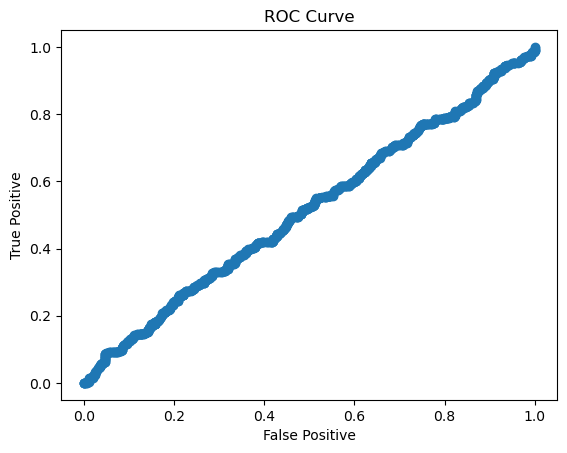

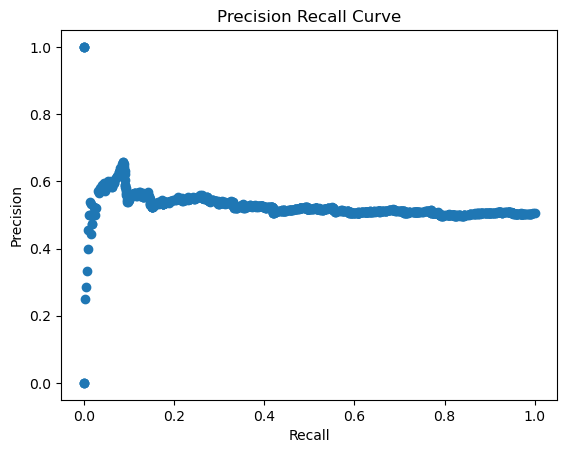

=========Plotting ROC with Scikit=========


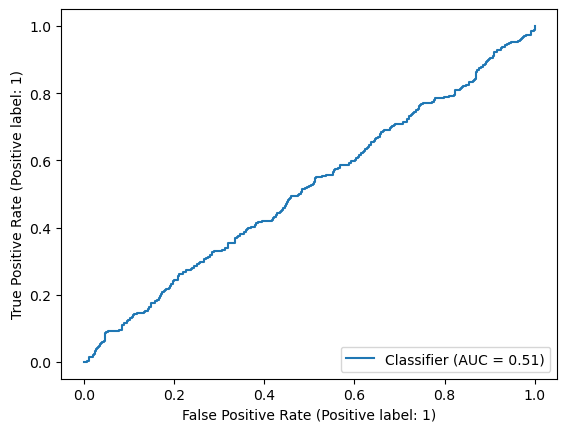

=========Plotting P&R with Scikit=========


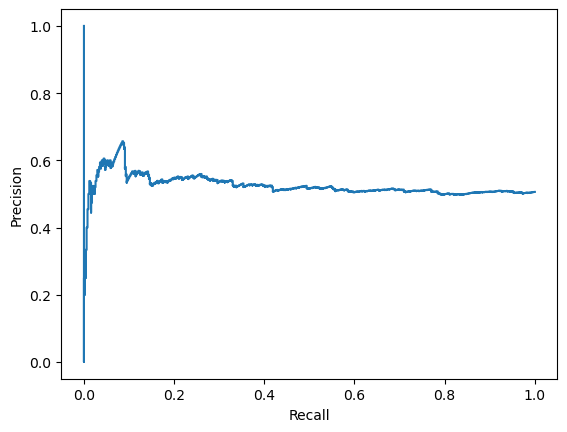

In [89]:
# Balanced case
balanced_labels = np.random.randint(0,2, 1000)
balanced_distributed_predictions = np.random.random(1000)
plot_curves_manual_and_scikit(labels=balanced_labels, preds=balanced_distributed_predictions)

=========Plotting ROC/PR with Hand-rolled Method=========


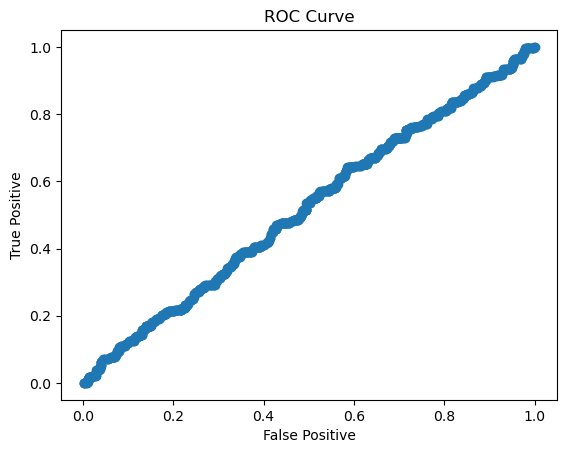

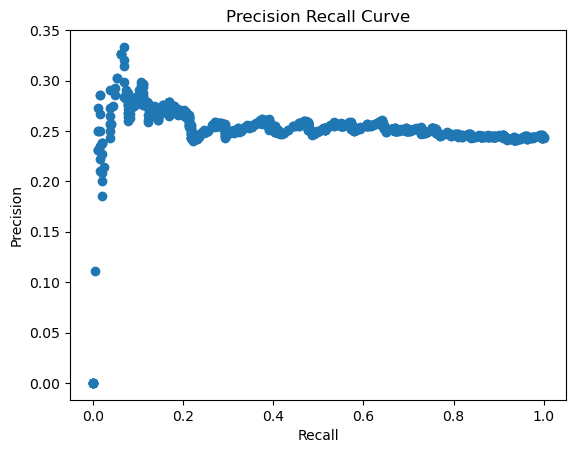

=========Plotting ROC with Scikit=========


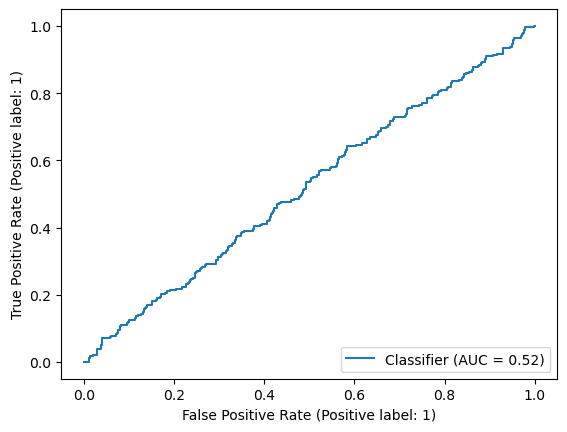

=========Plotting P&R with Scikit=========


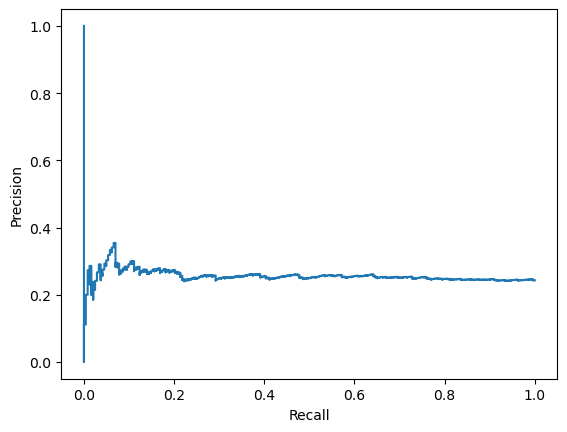

In [90]:
# Imbalanced (more negative) labels, balanced predictions
labels = np.append(np.random.randint(0,2,500), np.zeros(500))
np.random.shuffle(labels)
imbalanced_labels = labels
balanced_distributed_predictions = np.random.random(1000)
plot_curves_manual_and_scikit(labels=labels, preds=balanced_distributed_predictions)

=========Plotting ROC/PR with Hand-rolled Method=========


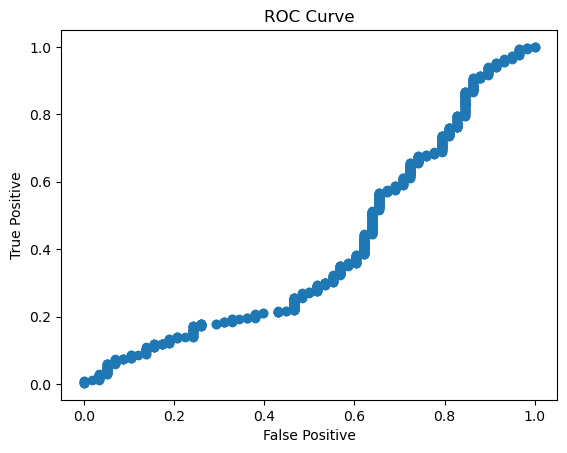

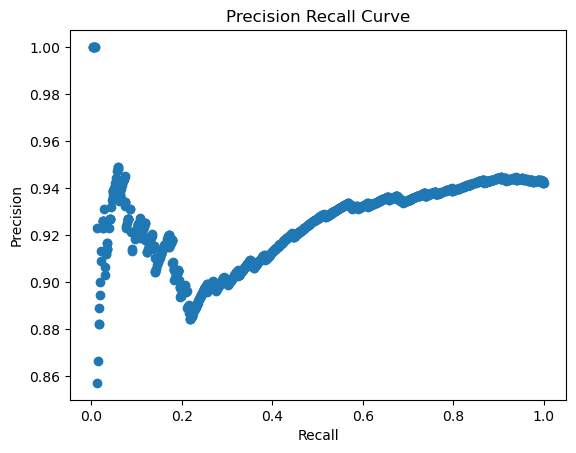

=========Plotting ROC with Scikit=========


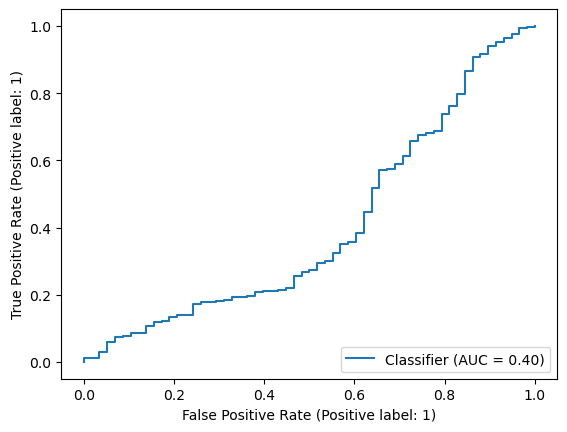

=========Plotting P&R with Scikit=========


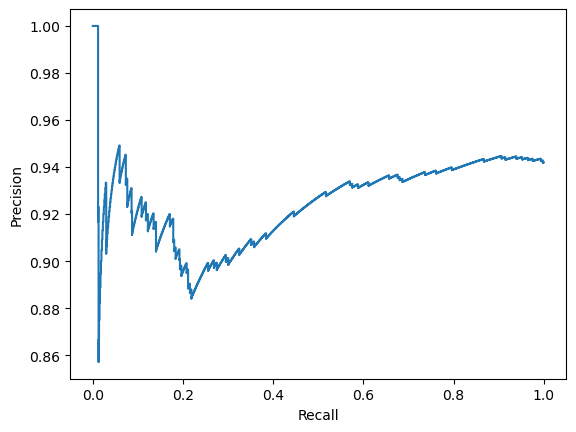

In [91]:
# Imbalanced (more positive) labels, balanced predictions
labels = np.append(np.random.randint(0,2,100), np.ones(900))
np.random.shuffle(labels)
balanced_distributed_predictions = np.random.random(1000)
plot_curves_manual_and_scikit(labels=labels, preds=balanced_distributed_predictions)

=========Plotting ROC/PR with Hand-rolled Method=========


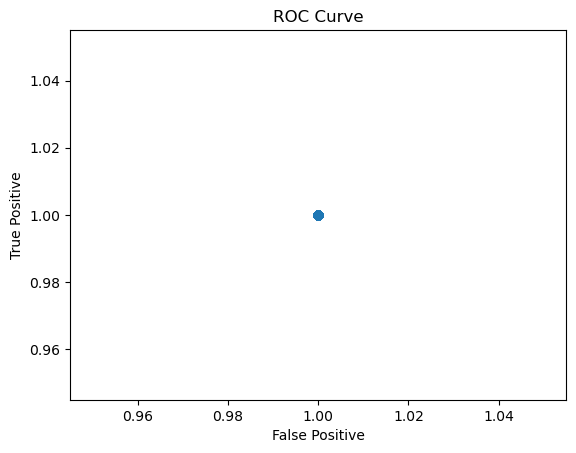

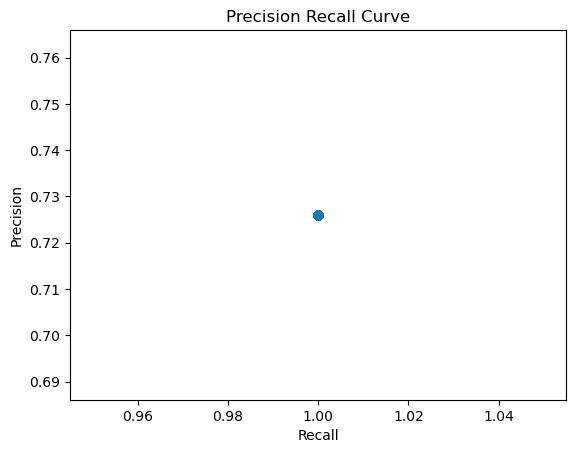

=========Plotting ROC with Scikit=========


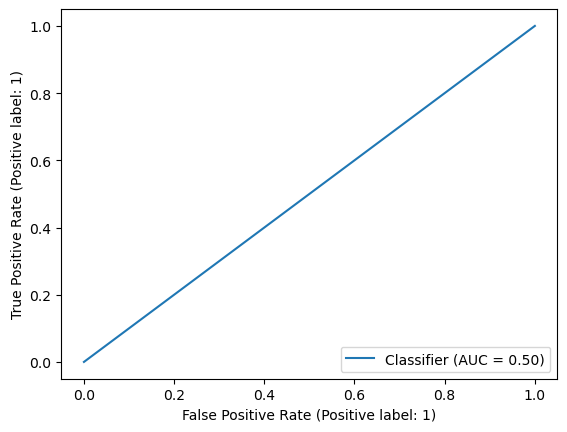

=========Plotting P&R with Scikit=========


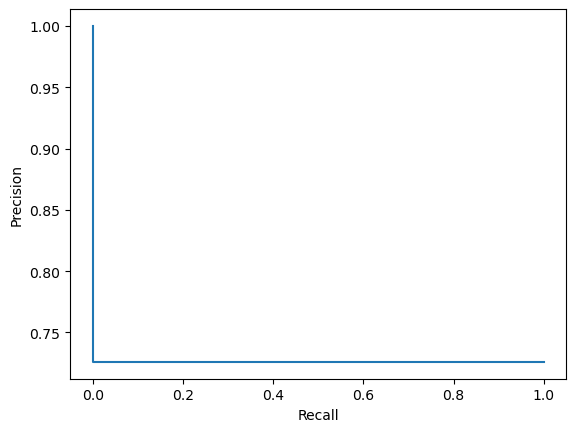

In [92]:
# Imbalanced (more positive) labels, all predictions positive
labels = np.append(np.random.randint(0,2,500), np.ones(500))
np.random.shuffle(labels)
all_positive_predictions = np.ones(1000)
plot_curves_manual_and_scikit(labels=labels, preds=all_positive_predictions)

=========Plotting ROC/PR with Hand-rolled Method=========


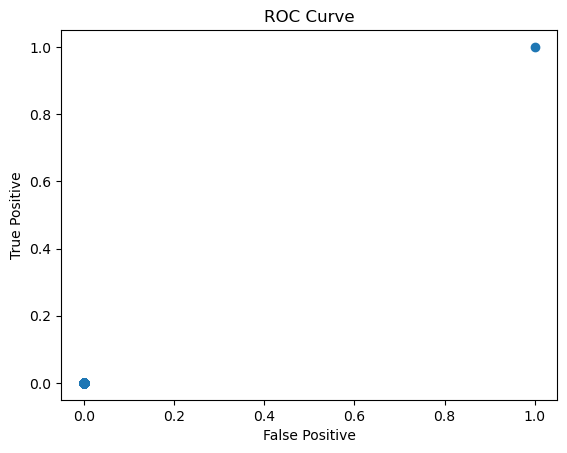

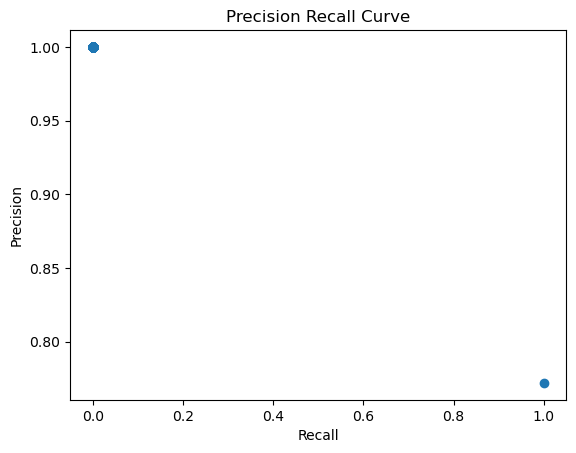

=========Plotting ROC with Scikit=========


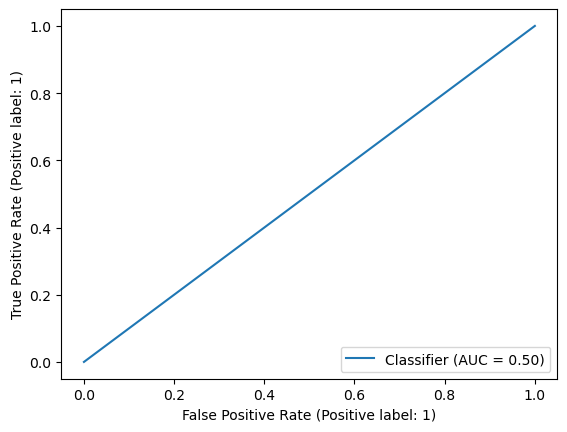

=========Plotting P&R with Scikit=========


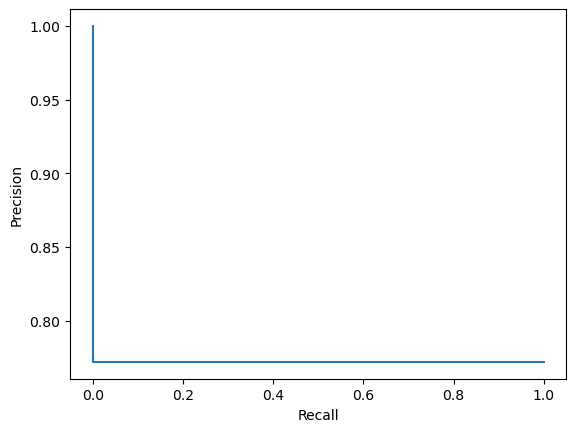

In [93]:
# Imbalanced (more positive) labels, all predictions negative
labels = np.append(np.random.randint(0,2,500), np.ones(500))
np.random.shuffle(labels)
all_negative_predictions = np.zeros(1000)
plot_curves_manual_and_scikit(labels=labels, preds=all_negative_predictions)

=========Plotting ROC/PR with Hand-rolled Method=========


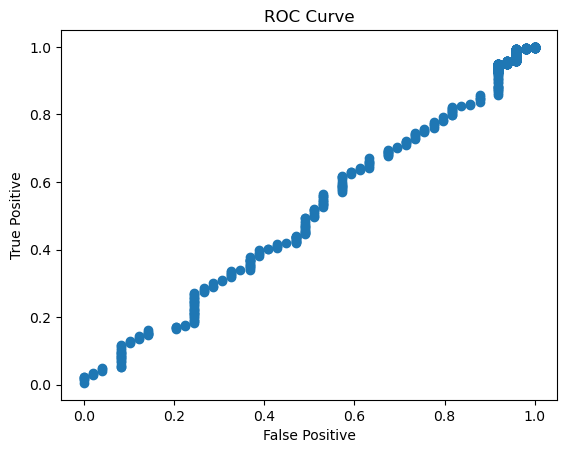

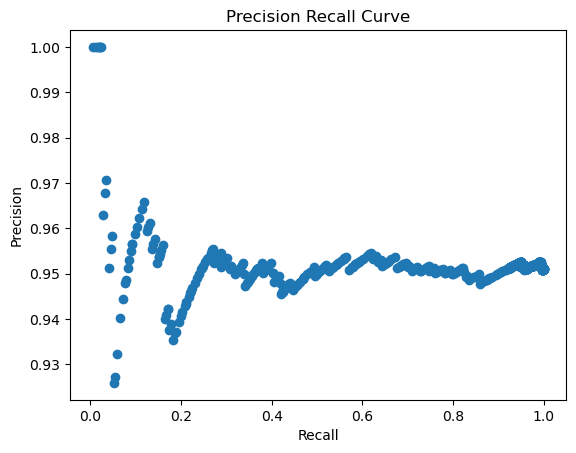

=========Plotting ROC with Scikit=========


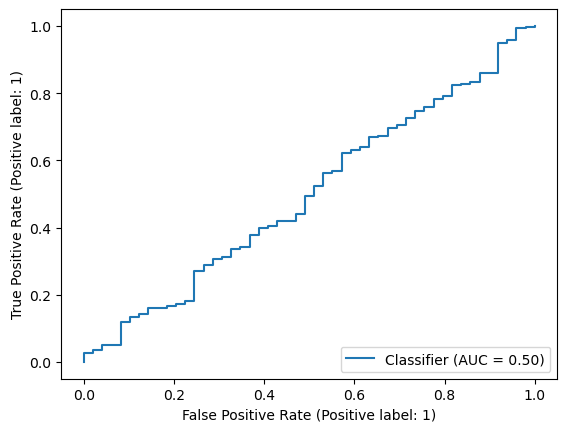

=========Plotting P&R with Scikit=========


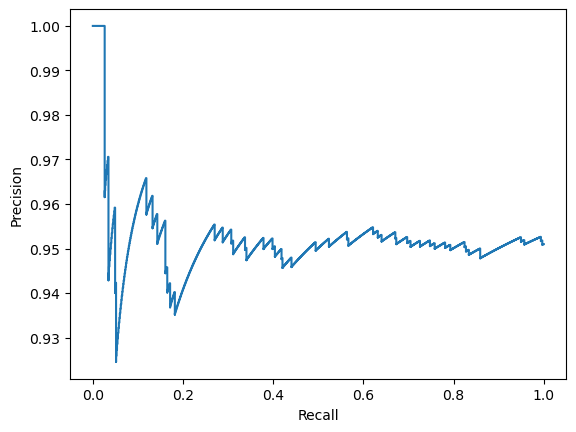

In [94]:
# Imbalanced (more positive) labels, imbalanced predictions (in the same direction)
# Note that, given the predictions are weighted toward the dominant class, I don't think you can call this 
# "having no predictive power" anymore -- it's a crude model that has learned predicting the dominant class helps
labels = np.append(np.random.randint(0,2,100), np.ones(900))
np.random.shuffle(labels)
positively_weighted_predictions = np.append(np.random.random(100), (np.random.random(900)/4 + 0.75))
np.random.shuffle(positively_weighted_predictions)
plot_curves_manual_and_scikit(labels=labels, preds=positively_weighted_predictions)